In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from sklearn.cross_validation import train_test_split #import train test splitting using sci-kit learn

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # this is for retina display of Macbook Pro
font = {'family' : 'Arial', 'weight' : 'bold', 'size'   : 14} #change 
matplotlib.rc('font', **font)
cmap = plt.cm.RdYlBu

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import h5py
os.chdir('/Users/jortordera/Documents/rabbit/') # CHANGE THIS TO WHERE YOU SAVE THE FILE
with h5py.File('L732_att.h5','r') as hf: # 0 weeks diet LEVEL 0
    gp = hf.get('L732')
    BSCs_749= np.array(gp.get('BSCs'))
    f = np.array(gp.get('frequency'))
with h5py.File('L735_att.h5','r') as hf:# 3 weeks diet LEVEL 0 
    gp = hf.get('L735')
    BSCs_756= np.array(gp.get('BSCs'))
with h5py.File('L731_att.h5','r') as hf:# 6 weeks diet LEVEL 0 
    gp = hf.get('L731')
    BSCs_731= np.array(gp.get('BSCs'))


BSCs_749.shape,  BSCs_756.shape,  BSCs_731.shape  

((1024, 11194), (1024, 10804), (1024, 13133))

In [3]:
def Coefficients(BSC, f):

    no_examples = BSC.shape[0]
    h = np.zeros((no_examples, 3))
    for i in range(0, no_examples):
        singleBSC = BSC[i,:]
        h[i,:] = np.polyfit(np.ravel(f),np.log10(singleBSC),2)
        
    return h



In [4]:
from sklearn.model_selection import train_test_split #import train test splitting using sci-kit learn
y1 = np.ones(BSCs_731.shape[1]) # label 1 if it is 6 weeks
y2 = np.zeros(BSCs_756.shape[1]) # label 0 if it is 3 weeks
y3 = -1.0 * np.ones(BSCs_731.shape[1]) # label -1 if it is 1 week
y = np.concatenate((y1, y2)) # concatenate the labels
y = np.concatenate((y, y3))
X = np.concatenate((BSCs_731.T, BSCs_756.T)) # concatenate the BSC curves
X = np.concatenate((X, BSCs_731.T))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24836, 1024), (12234, 1024), (24836,), (12234,))

In [6]:
H_train = Coefficients(X_train, f)
H_test = Coefficients(X_test, f)

In [14]:
H_train.shape

(24836, 3)

In [7]:
def plot_data(clf, X, y, y_pred):
   

    plt.figure()
    ax = plt.gca()
    h = 0.02
    
    
    tp = (y == y_pred)  # True Positive
    tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y==-1]
    X0, X1,X2 = X[y == 0], X[y == 1], X[y==-1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='red')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='blue')  # dark blue
    
    # class 3: dots
    plt.plot(X2_tp[:, 0], X2_tp[:, 1], 'o', alpha=alpha,
             color='green')
    plt.plot(X2_fp[:, 0], X2_fp[:, 1], '*', alpha=alpha,
             color='green')  #  green


    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
     
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.4)


1.0


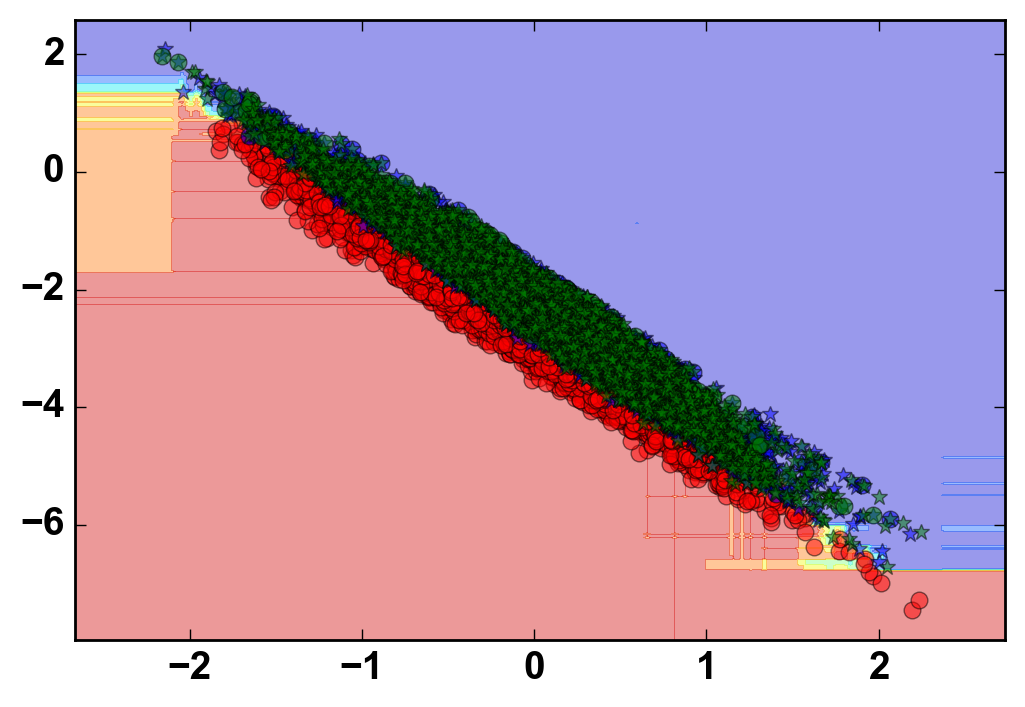

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=3, random_state=0) #store_covariances=True
pred = clf.fit(H_train[:,1:3], y_train).predict(H_test[:,1:3])
scores = clf.score(H_test[:,1:3],pred)
splot = plot_data(clf,H_test[:,1:3], y_test,  pred)

print(scores )
#can we know

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
cm = confusion_matrix(y_test, pred)
cm
#20% divide sum each row,col... 

array([[ 791,  164, 3352],
       [ 289, 2956,  293],
       [3584,  169,  636]])

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='jorget2', api_key='Bn35iYkVaIsXNE0jJzH0')

In [12]:
#X0_tp,X1_tp=plot3d(H_test[:,:], y_test,pred
class1 = np.empty_like(H_test)
class2 = np.empty_like(H_test)
class3 = np.empty_like(H_test)



for i in range(0, H_test.shape[0]):
   
    if (pred[i] == 1):
        class1[i,0:2] =  H_test[i,0:2]
      

    elif (pred[i] == -1):
        class2[i,0:2] =  H_test[i,0:2]
    else:
        
        class3[i,0:2] =  H_test[i,0:2]

In [13]:
trace1 = go.Scatter3d(
    x= class1[:,0],
    y= class1[:,1],
    z= class1[:,2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x= class2[:,0],
    y= class2[:,1],
    z= class2[:,2],
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace3 = go.Scatter3d(
    x= class3[:,0],
    y= class3[:,1],
    z= class3[:,2],
    mode='markers',
    marker=dict(
        color='rgb(255, 117, 20)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(255, 117, 20)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')